In [1]:
import pandas as pd

# Load the dataset
file_path = '/Users/punyakn/Desktop/DMML2/CA1/House_Rent_Dataset.csv'
house_rent = pd.read_csv(file_path)

# Display dataset information
print("Dataset Information:")
print(house_rent.info())

# Display the first few rows of the dataset
print("\nFirst Few Rows of the Dataset:")
print(house_rent.head())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB
None

First Few Rows of the Dataset:
  Posted On  BHK   Rent  Size            Floor    Area Type  \
0  18/05/22    2  10000  1100  Ground out of 2   Super Area   

In [2]:
# Data Preprocessing and Cleaning

# Convert 'Posted On' to datetime with automatic inference
house_rent['Posted On'] = pd.to_datetime(house_rent['Posted On'])

In [3]:
# Process 'Floor' column
def process_floor(floor):
    if isinstance(floor, str):
        # Handle textual descriptions
        if 'Ground' in floor:
            return 0  # Assign a value for 'Ground'
        try:
            return int(floor.split()[0])  # Extract numeric part if possible
        except ValueError:
            return None  # Handle unexpected formats by returning NaN
    return floor

house_rent['Floor'] = house_rent['Floor'].apply(process_floor)


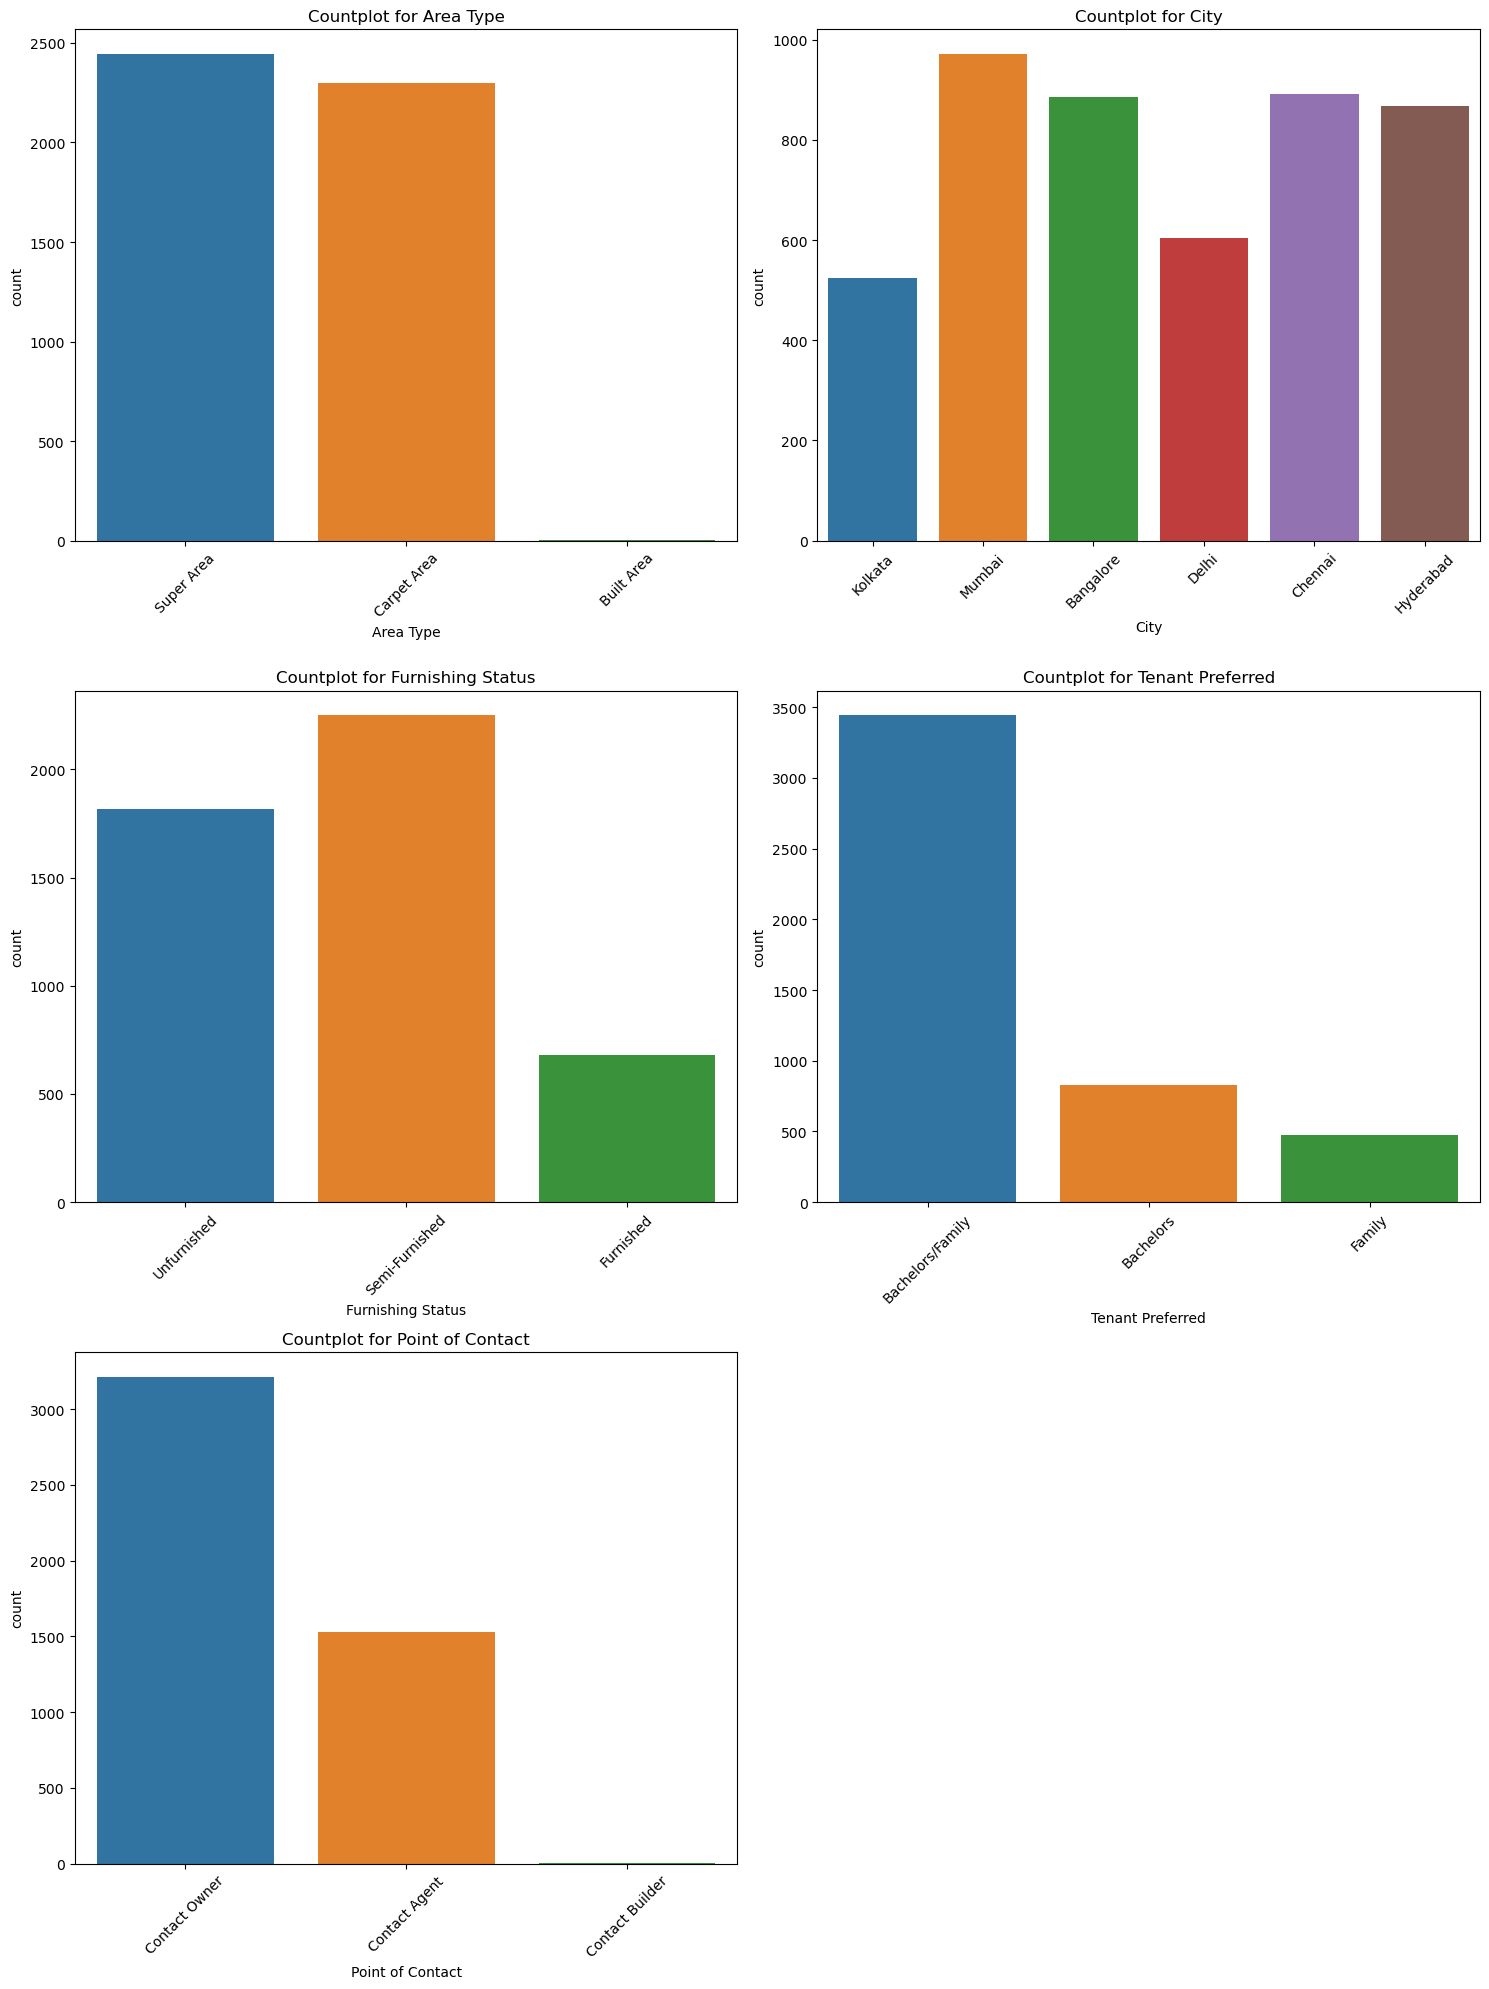

In [4]:
#Basic Visualtion(1) with the raw data we have loaded.

import matplotlib.pyplot as plt
import seaborn as sns

# Ensure your categorical columns are encoded or ready for plotting
categorical_columns = ['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']

# Initialize the figure and set the size
plt.figure(figsize=(15, 20))

# Plot countplots for each categorical feature
for i, col in enumerate(categorical_columns):
    plt.subplot(3, 2, i + 1)  # Create a 3x2 grid of subplots
    sns.countplot(data=house_rent, x=col)
    plt.title(f"Countplot for {col}")
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better readability

plt.tight_layout()  # Adjust subplot spacing
plt.show()

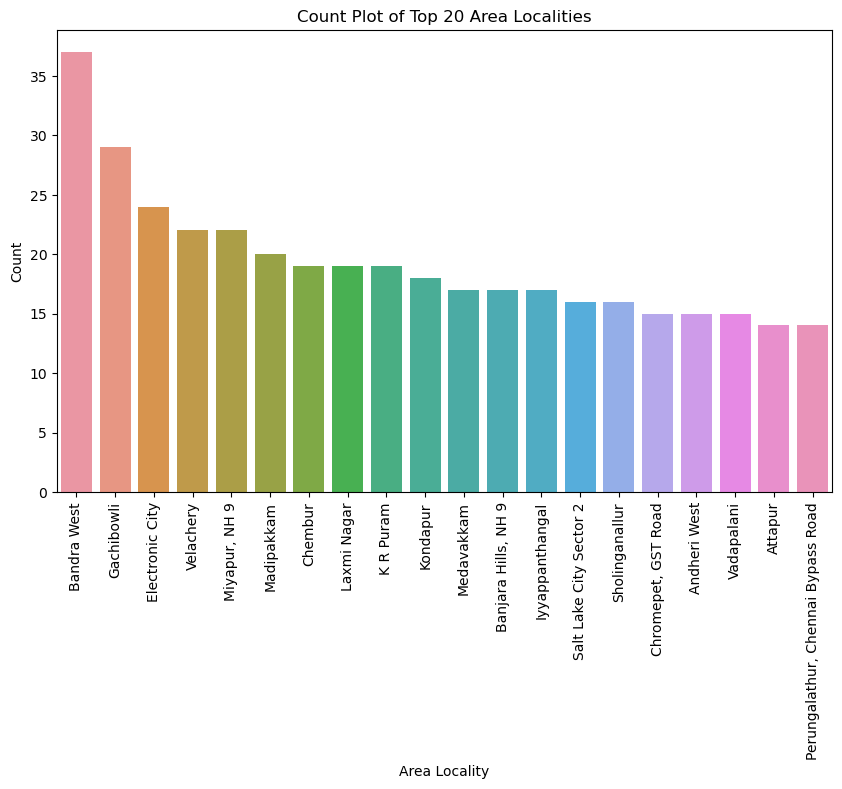

In [5]:
#Basic Visualtion(2) with the raw data we have loaded(top_20_localities)

top_20_localities = house_rent["Area Locality"].value_counts().head(20).index
house_rent_top_20 = house_rent[house_rent["Area Locality"].isin(top_20_localities)]

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.countplot(data=house_rent_top_20, x="Area Locality", order=top_20_localities)
plt.title("Count Plot of Top 20 Area Localities")
plt.xlabel("Area Locality")
plt.ylabel("Count")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [6]:
# Convert categorical columns to numeric
house_rent['Area Type'] = house_rent['Area Type'].map({'Super Area': 1, 'Carpet Area': 0, 'Built Area': 2})
house_rent['Furnishing Status'] = house_rent['Furnishing Status'].map({'Unfurnished': 0, 'Semi-Furnished': 1, 'Furnished': 2})
house_rent['Tenant Preferred'] = house_rent['Tenant Preferred'].map({'Bachelors/Family': 0, 'Bachelors': 1, 'Family': 2})
house_rent['Point of Contact'] = house_rent['Point of Contact'].map({'Contact Owner': 0, 'Contact Agent': 1, 'Contact Builder': 2})

In [7]:
# Label encoding for categorical data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
house_rent['Area Locality'] = le.fit_transform(house_rent['Area Locality'])

In [8]:
# Save the cleaned DataFrame to a new CSV file
cleaned_file_path = '/Users/punyakn/Desktop/DMML2/CA1/House_Rent_Dataset_Cleaned.csv'
house_rent.to_csv(cleaned_file_path, index=False)

print(f"\nCleaned dataset saved to {cleaned_file_path}")


Cleaned dataset saved to /Users/punyakn/Desktop/DMML2/CA1/House_Rent_Dataset_Cleaned.csv


In [9]:
# Display descriptive statistics
print("\nDescriptive Statistics:")
print(house_rent.describe())


Descriptive Statistics:
               BHK          Rent         Size        Floor    Area Type  \
count  4746.000000  4.746000e+03  4746.000000  4712.000000  4746.000000   
mean      2.083860  3.499345e+04   967.490729     3.470501     0.516224   
std       0.832256  7.810641e+04   634.202328     5.780384     0.500632   
min       1.000000  1.200000e+03    10.000000     0.000000     0.000000   
25%       2.000000  1.000000e+04   550.000000     1.000000     0.000000   
50%       2.000000  1.600000e+04   850.000000     2.000000     1.000000   
75%       3.000000  3.300000e+04  1200.000000     3.000000     1.000000   
max       6.000000  3.500000e+06  8000.000000    76.000000     2.000000   

       Area Locality  Furnishing Status  Tenant Preferred     Bathroom  \
count    4746.000000        4746.000000       4746.000000  4746.000000   
mean     1091.711547           0.760851          0.373788     1.965866   
std       633.195921           0.684553          0.658078     0.884532   
min

In [10]:
# Check for missing values in each column
print("Missing values by column:")
print(house_rent.isnull().sum())

# Check for missing values in each row
print("\nMissing values by row:")
print(house_rent.isnull().sum(axis=1).describe())

# Check the total number of missing values
print("\nTotal number of missing values in the dataset:")
print(house_rent.isnull().sum().sum())

Missing values by column:
Posted On             0
BHK                   0
Rent                  0
Size                  0
Floor                34
Area Type             0
Area Locality         0
City                  0
Furnishing Status     0
Tenant Preferred      0
Bathroom              0
Point of Contact      0
dtype: int64

Missing values by row:
count    4746.000000
mean        0.007164
std         0.084345
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
dtype: float64

Total number of missing values in the dataset:
34


In [11]:
# Calculate median of 'Floor' column
median_floor = house_rent['Floor'].median()

# Fill missing values with the median
house_rent['Floor'].fillna(median_floor, inplace=True)

# Re-check for missing values
print("\nMissing values by column after imputation:")
print(house_rent.isnull().sum())


Missing values by column after imputation:
Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64


In [12]:
# Check for duplicate rows
print("\nDuplicate rows:")
print(house_rent[house_rent.duplicated()])

# Count the number of duplicate rows
print("\nNumber of duplicate rows:")
print(house_rent.duplicated().sum())

# Display duplicate rows
duplicate_rows = house_rent[house_rent.duplicated()]
print("\nDuplicate rows:")
print(duplicate_rows)

# Optionally, remove duplicate rows
house_rent = house_rent.drop_duplicates()



Duplicate rows:
     Posted On  BHK   Rent  Size  Floor  Area Type  Area Locality     City  \
72  2022-06-26    2  16000   850    1.0          0           1759  Kolkata   
429 2022-03-06    2   5500   450    1.0          0            314  Kolkata   

     Furnishing Status  Tenant Preferred  Bathroom  Point of Contact  
72                   1                 1         1                 1  
429                  0                 0         1                 0  

Number of duplicate rows:
2

Duplicate rows:
     Posted On  BHK   Rent  Size  Floor  Area Type  Area Locality     City  \
72  2022-06-26    2  16000   850    1.0          0           1759  Kolkata   
429 2022-03-06    2   5500   450    1.0          0            314  Kolkata   

     Furnishing Status  Tenant Preferred  Bathroom  Point of Contact  
72                   1                 1         1                 1  
429                  0                 0         1                 0  


In [13]:
# Save the cleaned DataFrame to a new CSV file
cleaned_file_path = '/Users/punyakn/Desktop/DMML2/CA1/House_Rent_Dataset_Cleaned_1.csv'
house_rent.to_csv(cleaned_file_path, index=False)

print(f"\nCleaned dataset saved to {cleaned_file_path}")


Cleaned dataset saved to /Users/punyakn/Desktop/DMML2/CA1/House_Rent_Dataset_Cleaned_1.csv


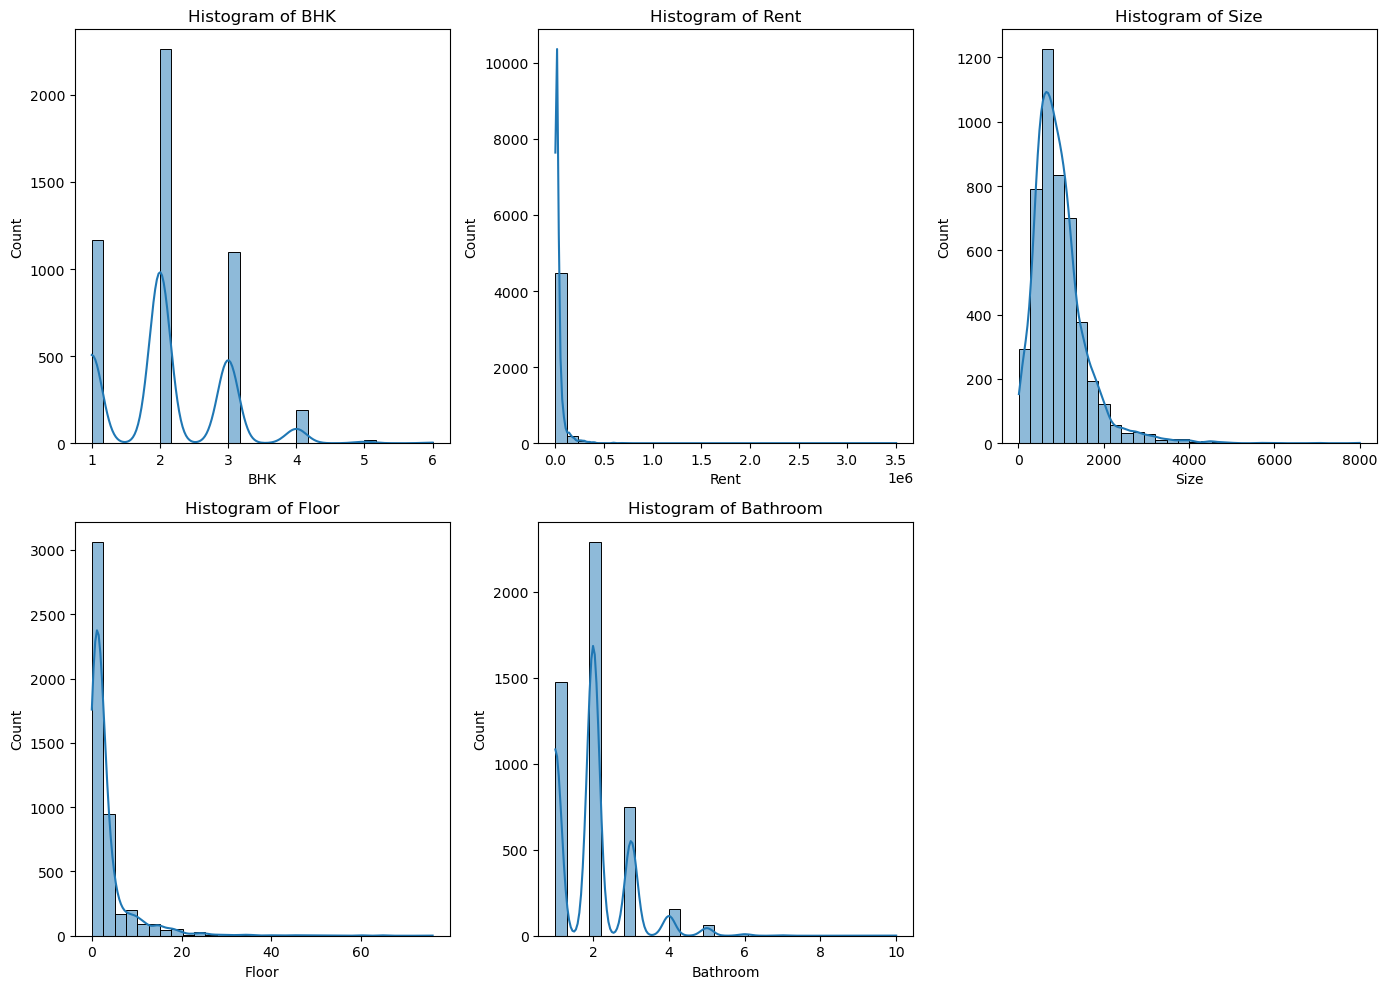

In [14]:
#Visualtion(3) with the cleaned data we have loaded.
#Histograms are useful for understanding the distribution of numerical features.

import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the figure and set the size
plt.figure(figsize=(14, 10))

# Plot histograms for numerical features
numerical_features = ['BHK', 'Rent', 'Size', 'Floor', 'Bathroom'] 
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)  # Create a 2x3 grid of subplots
    sns.histplot(house_rent[feature], bins=30, kde=True)
    plt.title(f"Histogram of {feature}")

plt.tight_layout()  # Adjust subplot spacing
plt.show()


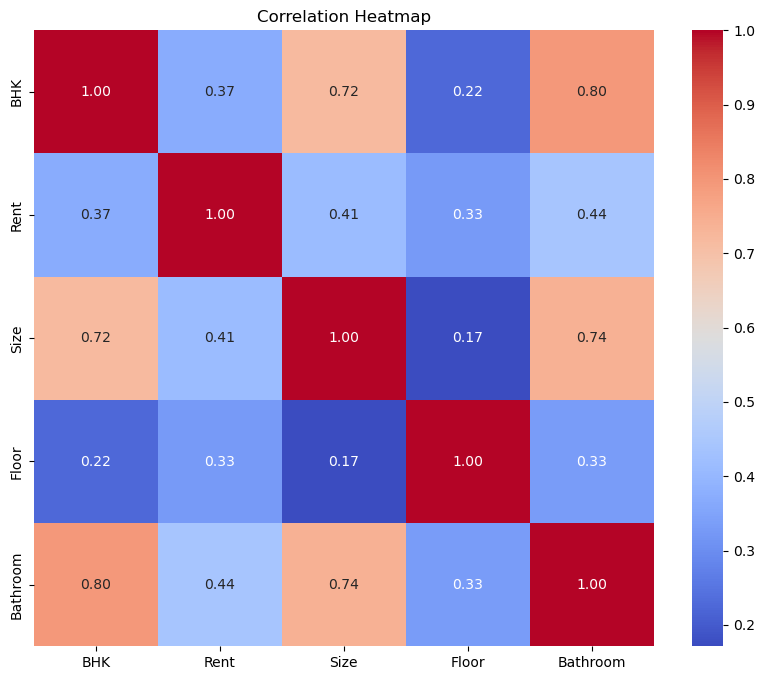

In [15]:
#Visualtion(4) with the cleaned data we have loaded.
#A heatmap can show the correlation between numerical features.

plt.figure(figsize=(10, 8))

# Compute the correlation matrix
correlation_matrix = house_rent[numerical_features].corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


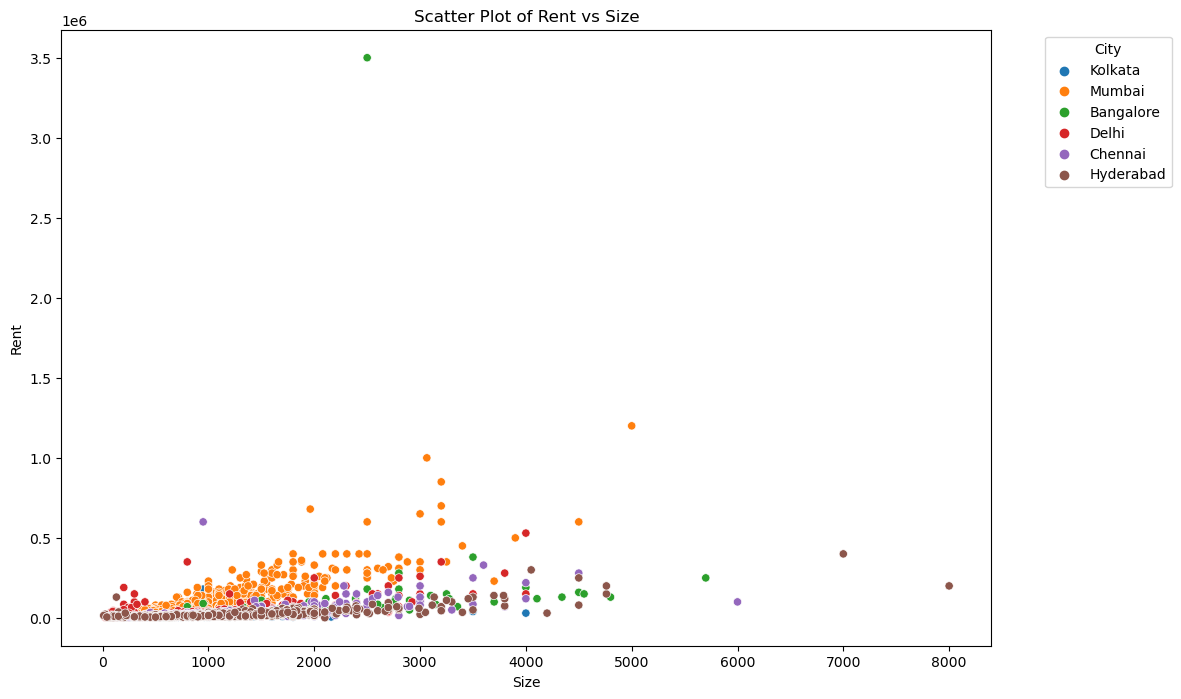

In [16]:
##Visualtion(5) with the cleaned data we have loaded.
#Scatter plots are useful for examining the relationship between two numerical features.

plt.figure(figsize=(12, 8))

# Example scatter plot between 'Rent' and 'Size'
sns.scatterplot(data=house_rent, x='Size', y='Rent', hue='City')  # You can use other features or remove hue
plt.title('Scatter Plot of Rent vs Size')
plt.xlabel('Size')
plt.ylabel('Rent')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


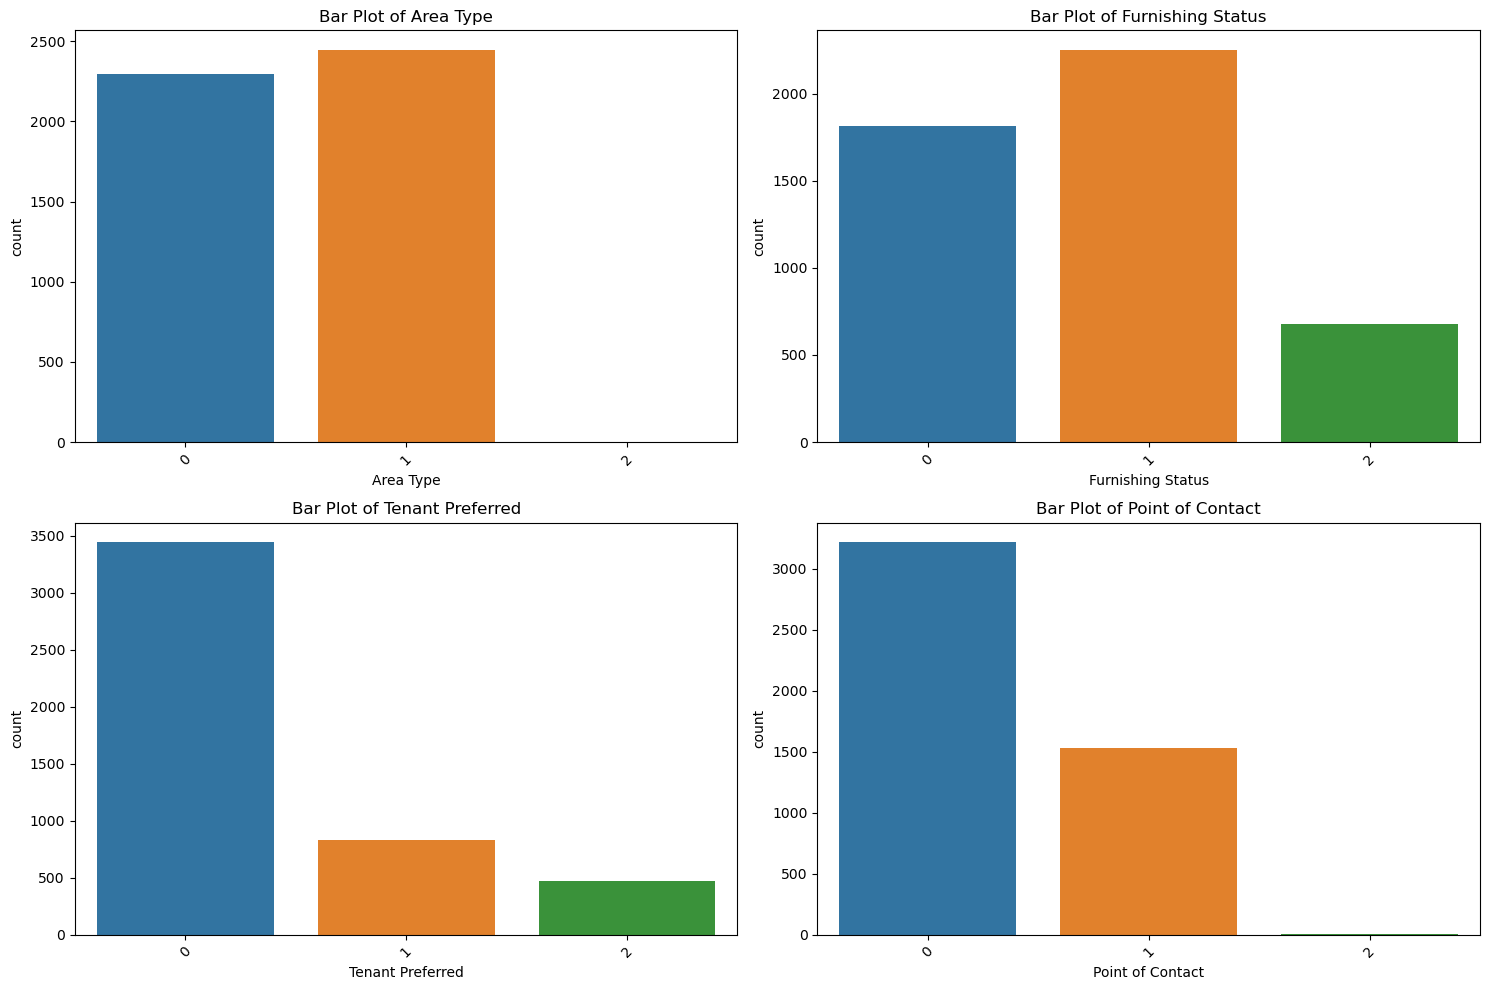

In [17]:
#Similar to Basic Visualtion(1) but with the categorical features.
#Visualtion(6) with the cleaned data we have loaded.

plt.figure(figsize=(15, 10))

# Plot bar plots for categorical features
categorical_features = ['Area Type', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 2, i + 1)  # Create a 2x2 grid of subplots
    sns.countplot(data=house_rent, x=feature)
    plt.title(f"Bar Plot of {feature}")
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better readability

plt.tight_layout()  # Adjust subplot spacing
plt.show()


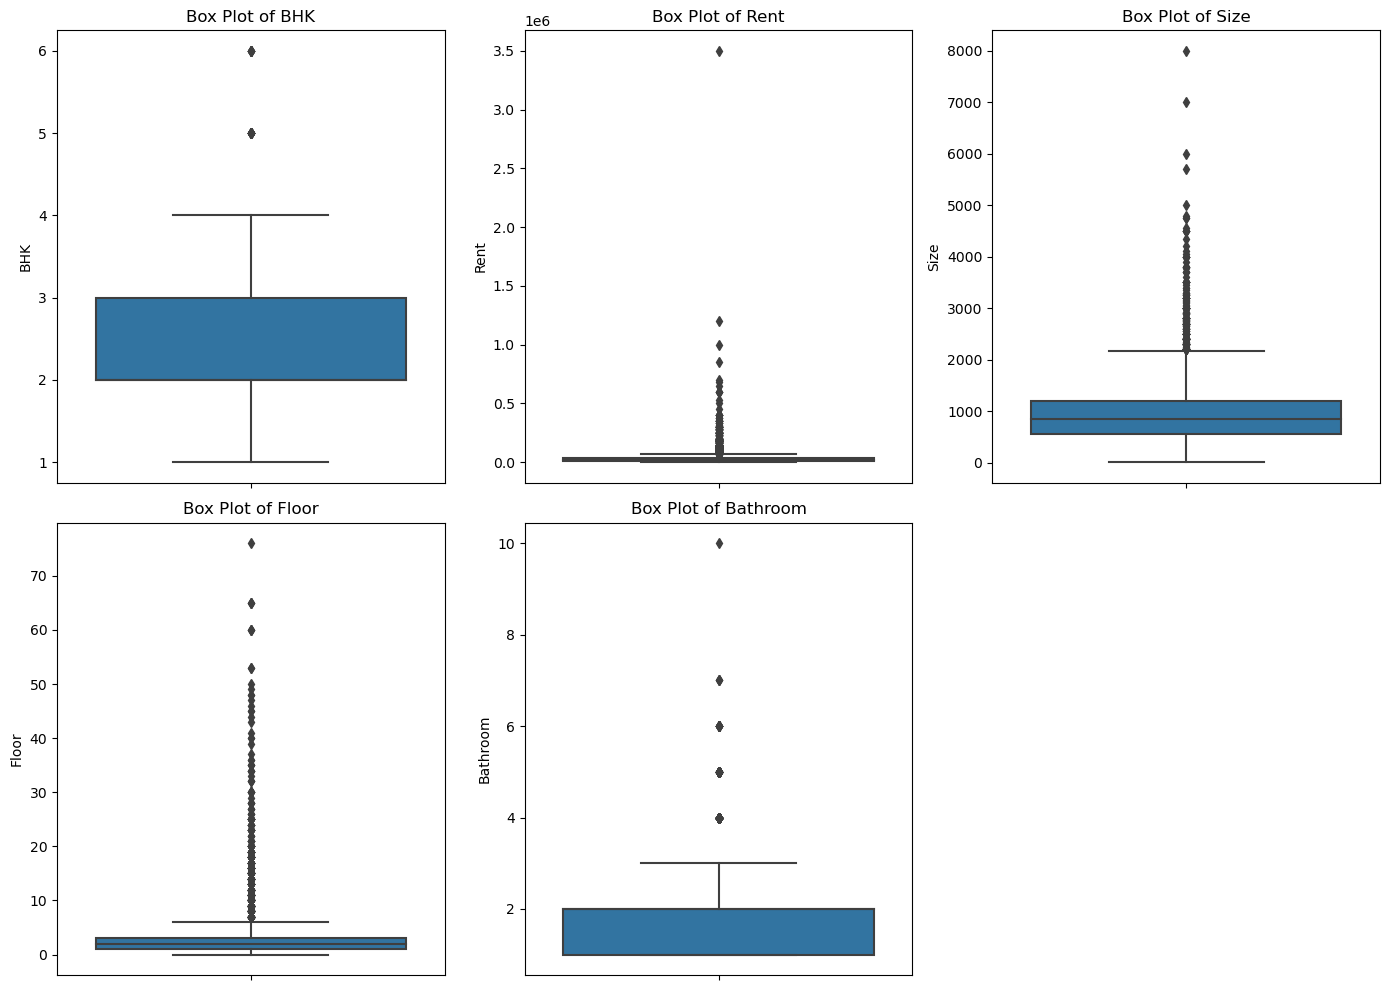

In [18]:
##Visualtion(7) with the cleaned data we have loaded.
#Box plots are useful to visualize the distribution and detect outliers.

plt.figure(figsize=(14, 10))

# Plot box plots for numerical features
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)  # Create a 2x3 grid of subplots
    sns.boxplot(y=house_rent[feature])
    plt.title(f"Box Plot of {feature}")

plt.tight_layout()  # Adjust subplot spacing
plt.show()


In [19]:
#Outlier detection(1):Z-score

#The Z-score measures how many standard deviations an element is from the mean.
#Outliers are usually defined as those with a Z-score greater than 3 or less than -3.from scipy import stats

from scipy import stats

# Calculate Z-scores for numerical features
z_scores = stats.zscore(house_rent[numerical_features])

# Create a DataFrame of Z-scores
z_scores_df = pd.DataFrame(z_scores, columns=numerical_features)

# Identify outliers
outliers = (z_scores_df.abs() > 3).any(axis=1)

print(f"Number of outlier rows based on Z-score: {outliers.sum()}")


Number of outlier rows based on Z-score: 230


In [20]:
#Outlier detection(2):Using IQR (Interquartile Range)

#The IQR method involves calculating the range between the 25th percentile (Q1) and 75th percentile (Q3).

# Calculate IQR for each numerical feature and identify outliers
def identify_outliers_iqr(df, features):
    outlier_indices = []
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        outlier_condition = (df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR))
        outlier_indices.extend(df[outlier_condition].index)
    
    return set(outlier_indices)

outlier_indices = identify_outliers_iqr(house_rent, numerical_features)
print(f"Number of outlier rows based on IQR: {len(outlier_indices)}")


Number of outlier rows based on IQR: 974


In [21]:
# Remove rows identified as outliers
house_rent_cleaned = house_rent.drop(index=outlier_indices)

# Verify that outliers have been removed
print(f"\nNumber of outlier rows after removal: {house_rent_cleaned.duplicated().sum()}")



Number of outlier rows after removal: 0


In [22]:
# Save the cleaned DataFrame to a new CSV file
cleaned_file_path = '/Users/punyakn/Desktop/DMML2/CA1/House_Rent_Dataset_Cleaned_No_Outliers.csv'
house_rent_cleaned.to_csv(cleaned_file_path, index=False)

print(f"\nCleaned dataset with outliers removed saved to {cleaned_file_path}")



Cleaned dataset with outliers removed saved to /Users/punyakn/Desktop/DMML2/CA1/House_Rent_Dataset_Cleaned_No_Outliers.csv


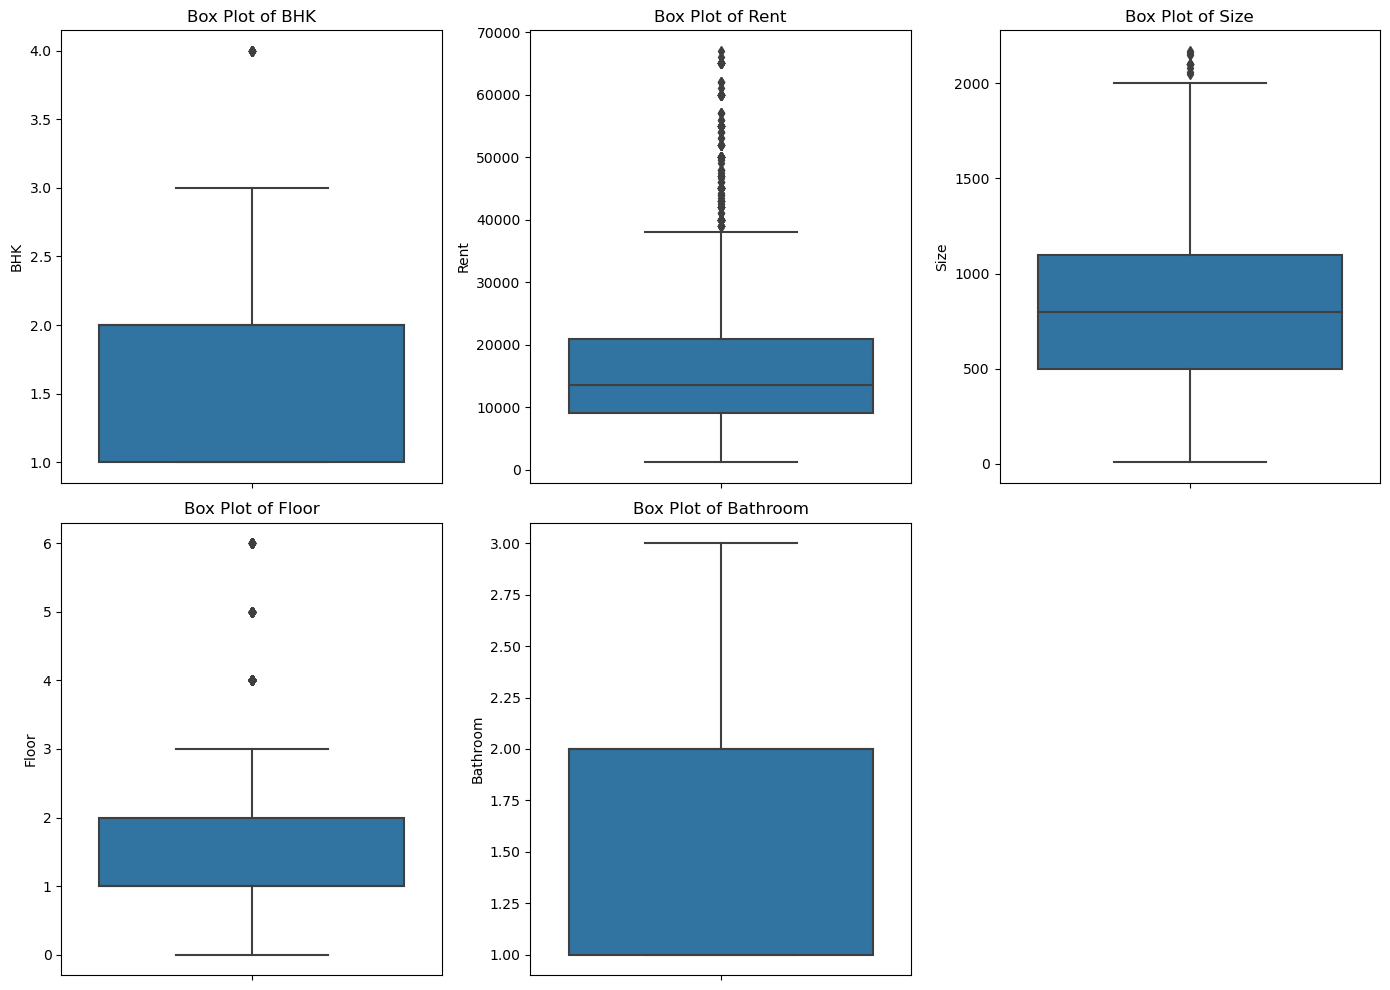

In [23]:
#Visualtion(8) with the after the outlier removal

plt.figure(figsize=(14, 10))

# Plot box plots for numerical features
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)  # Create a 2x3 grid of subplots
    sns.boxplot(y=house_rent_cleaned[feature])
    plt.title(f"Box Plot of {feature}")

plt.tight_layout()  # Adjust subplot spacing
plt.show()


In [24]:
#Feature Selection and Scaling

from sklearn.preprocessing import StandardScaler

# Select features and target variable
features = ['BHK', 'Size', 'Floor', 'Bathroom', 'Area Type', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']
target = 'Rent'

# Prepare feature and target arrays
X = house_rent_cleaned[features].values
y = house_rent_cleaned[target].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [25]:
#Split the Data

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [26]:
#!pip install tensorflow

In [27]:
#import tensorflow as tf
#print(tf.__version__)  # Print the TensorFlow version to ensure it's installed correctly

In [28]:
#pip install numpy pandas matplotlib seaborn scikit-learn

In [29]:
#ANN(1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the ANN model
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1))  # Output layer with no activation function for regression

# Compile the model
ann_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_ann = ann_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50


/Users/punyakn/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 438819296.0000 - val_loss: 478872192.0000
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - loss: 435693696.0000 - val_loss: 477064384.0000
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 404142048.0000 - val_loss: 471475648.0000
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 395896736.0000 - val_loss: 459607488.0000
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - loss: 406829472.0000 - val_loss: 439683776.0000
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 396451712.0000 - val_loss: 411091072.0000
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - loss: 345814144.0000 - val_loss: 374271904.0000
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - loss: 320738592.0000 - val_loss: 331498048.0000
Epoch 9/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - loss: 295923872.0000 - val_loss: 286479328.0000
Epoch 10/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - loss: 236499184.0000 - val_loss: 2438712

In [30]:
#Loss and Validation Loss:

#Training Loss (loss): This value represents how well the model is fitting the training data.
#                       Lower values generally indicate a better fit.

#Validation Loss (val_loss): This value represents how well the model is performing on the validation dataset, 
#                            which is a set of data not seen by the model during training. 
#                            Lower values indicate better generalization to unseen data.


#Epoch 1: The loss is 435,666,176, and the validation loss is 478,968,704.
#Epoch 50: The loss is 71,429,664, and the validation loss is 84,594,040.

#values are decreasing hence model is training and fitting better.

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions using the test set
y_pred_ann = ann_model.predict(X_test)

# Calculate performance metrics
mae_ann = mean_absolute_error(y_test, y_pred_ann)
mse_ann = mean_squared_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)

print(f"ANN Mean Absolute Error: {mae_ann}")
print(f"ANN Mean Squared Error: {mse_ann}")
print(f"ANN R² Score: {r2_ann}")


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step
ANN Mean Absolute Error: 5874.049660922994
ANN Mean Squared Error: 68162597.81080289
ANN R² Score: 0.4946566609042733


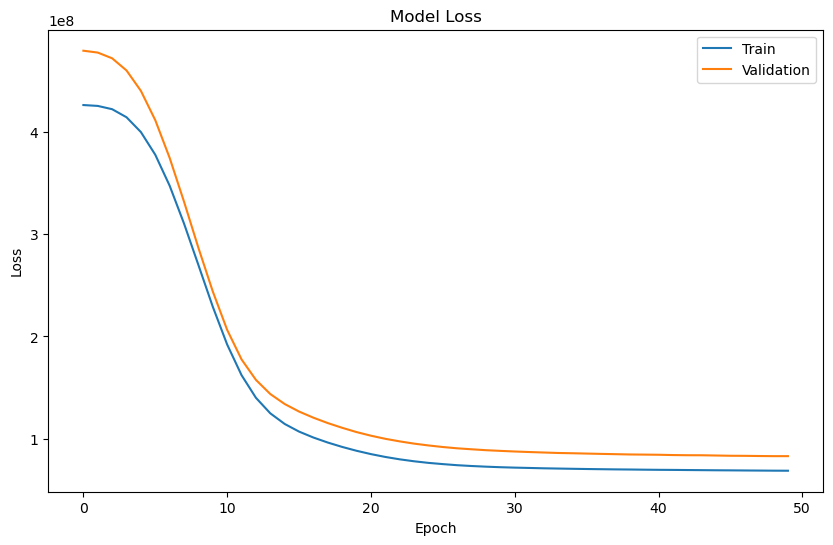

In [32]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history_ann.history['loss'])
plt.plot(history_ann.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

In [33]:
#RNN(1)
import numpy as np
from tensorflow.keras.layers import SimpleRNN, Dense

def build_rnn_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Reshape data for RNN (samples, timesteps, features)
X_train_rnn = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build and train the RNN model
rnn_model = build_rnn_model((1, X_train.shape[1]))
history_rnn = rnn_model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50


/Users/punyakn/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 437680288.0000 - val_loss: 479179008.0000
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - loss: 438026176.0000 - val_loss: 479072000.0000
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 439391936.0000 - val_loss: 478891840.0000
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - loss: 428700320.0000 - val_loss: 478612832.0000
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - loss: 429657792.0000 - val_loss: 478224480.0000
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 400595808.0000 - val_loss: 477717504.0000
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - loss: 448722496.0000 - val_loss: 477086144.0000
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - loss: 420873728.0000 - val_loss: 476347424.0000
Epoch 9/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 410776320.0000 - val_loss: 475493248.0000
Epoch 10/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - loss: 404086592.0000 - val_loss: 4745173

In [34]:
# Evaluate the RNN model
y_pred_rnn = rnn_model.predict(X_test_rnn)
mae_rnn = mean_absolute_error(y_test, y_pred_rnn)
mse_rnn = mean_squared_error(y_test, y_pred_rnn)
r2_rnn = r2_score(y_test, y_pred_rnn)

print(f"RNN Mean Absolute Error: {mae_rnn}")
print(f"RNN Mean Squared Error: {mse_rnn}")
print(f"RNN R² Score: {r2_rnn}")

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
RNN Mean Absolute Error: 14410.78743375581
RNN Mean Squared Error: 313130491.4792751
RNN R² Score: -1.3214844096177356


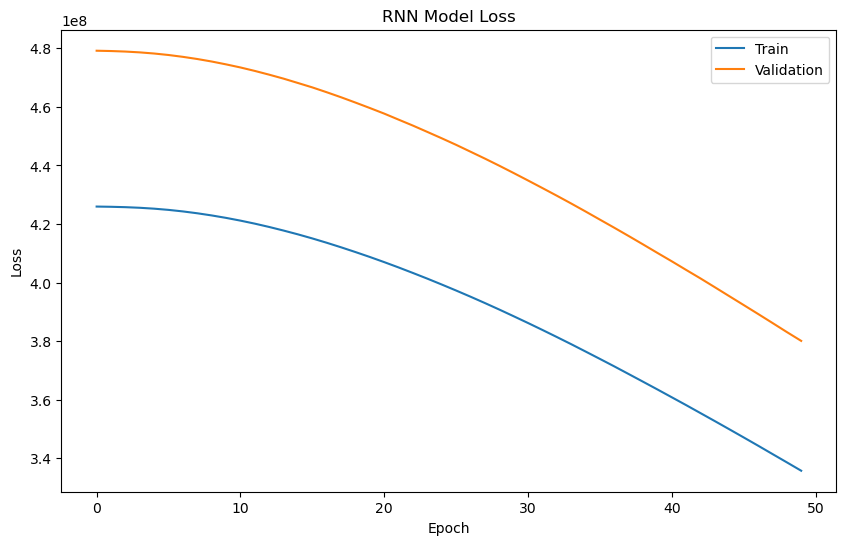

In [35]:
# Plot training & validation loss values for RNN
plt.figure(figsize=(10, 6))
plt.plot(history_rnn.history['loss'])
plt.plot(history_rnn.history['val_loss'])
plt.title('RNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

In [36]:
#The high Mean Absolute Error (MAE) and Mean Squared Error (MSE), along with the negative R² score for the RNN
#Use of LSTM instead of RNN

In [37]:
#LSTM(1)

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense , Input
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Reshape data for LSTM (samples, timesteps, features)
X_train_lstm = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [38]:
# Define the LSTM model using Input layer
lstm_model = Sequential()
lstm_model.add(Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))  # Input layer
lstm_model.add(LSTM(50, return_sequences=True))  # LSTM layer with 50 units
lstm_model.add(LSTM(25))  # LSTM layer with 25 units
lstm_model.add(Dense(1))  # Output layer with no activation function for regression

In [39]:
# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')


In [40]:
# Evaluate the model
lstm_loss = lstm_model.evaluate(X_test_lstm, y_test)
print(f"LSTM Test Loss: {lstm_loss}")

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - loss: 380602304.0000
LSTM Test Loss: 401979776.0


In [41]:
# Make predictions
y_pred_lstm = lstm_model.predict(X_test_lstm)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [42]:
# Compute evaluation metrics for LSTM
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

print(f"LSTM Mean Absolute Error: {mae_lstm}")
print(f"LSTM Mean Squared Error: {mse_lstm}")
print(f"LSTM R² Score: {r2_lstm}")

LSTM Mean Absolute Error: 16343.071657666003
LSTM Mean Squared Error: 401979762.5645671
LSTM R² Score: -1.980194446624965


In [43]:
# Train the LSTM model and capture the history
history_lstm = lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)




Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 910us/step - loss: 440518848.0000 - val_loss: 479211328.0000
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 437496416.0000 - val_loss: 479074336.0000
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - loss: 428634688.0000 - val_loss: 478943552.0000
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 422701728.0000 - val_loss: 478805536.0000
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - loss: 430291680.0000 - val_loss: 478711200.0000
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - loss: 430366080.0000 - val_loss: 478634240.0000
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 422452448.0000 - val_loss: 478564384.0000
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 423923168.0000 - val_loss: 478497984.0000
Epoch 9/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - loss: 445722432.0000 - val_loss: 478434272.0000
Epoch 10/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 432488640.0000 - val_

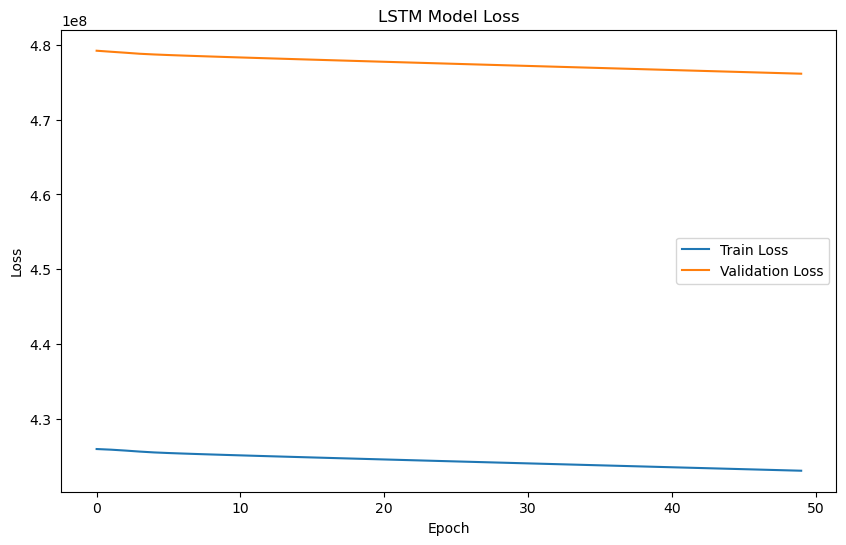

In [44]:
import matplotlib.pyplot as plt

# Plot training & validation loss values for LSTM
plt.figure(figsize=(10, 6))
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

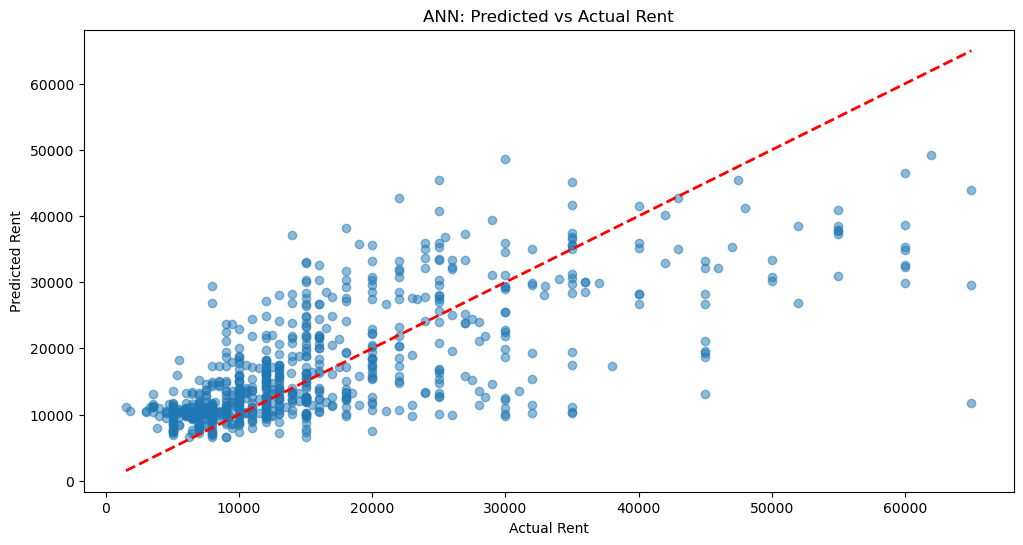

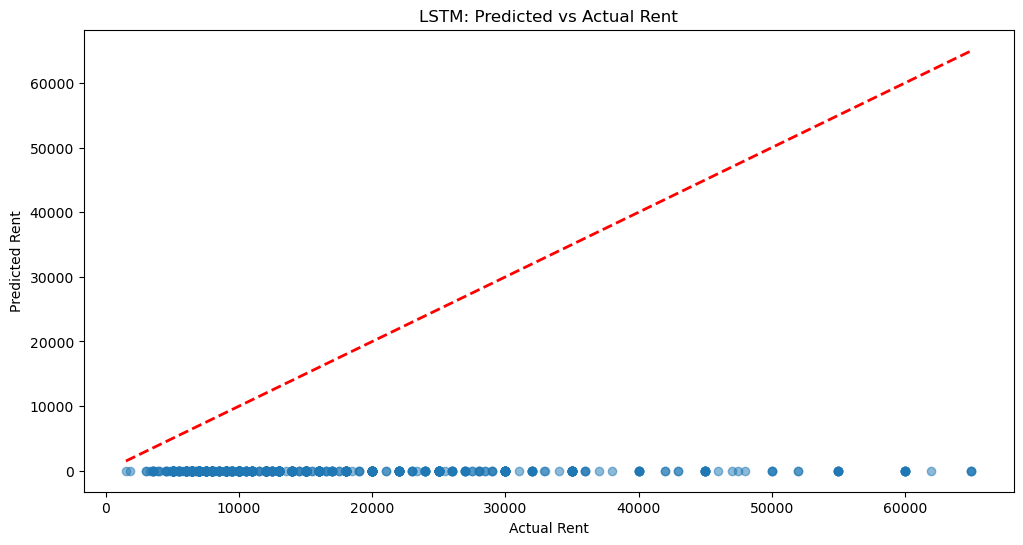

In [45]:
import matplotlib.pyplot as plt

# Scatter plot for ANN predictions
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_ann, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.title('ANN: Predicted vs Actual Rent')
plt.show()

# Scatter plot for LSTM predictions
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_lstm, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.title('LSTM: Predicted vs Actual Rent')
plt.show()


In [46]:
#ANN and LSTM(2)

from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define a more complex ANN model with dropout
ann_model_tuned = Sequential()
ann_model_tuned.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
ann_model_tuned.add(Dropout(0.5))  # Add dropout for regularization
ann_model_tuned.add(Dense(64, activation='relu'))
ann_model_tuned.add(Dropout(0.5))  # Add dropout for regularization
ann_model_tuned.add(Dense(32, activation='relu'))
ann_model_tuned.add(Dense(1))  # Output layer

# Compile the model
ann_model_tuned.compile(optimizer='adam', loss='mean_squared_error')

# Use early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history_ann_tuned = ann_model_tuned.fit(X_train, y_train, epochs=100, batch_size=32, 
                                       validation_split=0.2, verbose=1, 
                                       callbacks=[early_stopping])

# Evaluate the tuned model
y_pred_ann_tuned = ann_model_tuned.predict(X_test)

mae_ann_tuned = mean_absolute_error(y_test, y_pred_ann_tuned)
mse_ann_tuned = mean_squared_error(y_test, y_pred_ann_tuned)
r2_ann_tuned = r2_score(y_test, y_pred_ann_tuned)

print(f"Tuned ANN Mean Absolute Error: {mae_ann_tuned}")
print(f"Tuned ANN Mean Squared Error: {mse_ann_tuned}")
print(f"Tuned ANN R² Score: {r2_ann_tuned}")


Epoch 1/100


/Users/punyakn/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 448982944.0000 - val_loss: 477495072.0000
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - loss: 418168608.0000 - val_loss: 435534720.0000
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - loss: 346427104.0000 - val_loss: 239507744.0000
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - loss: 154055504.0000 - val_loss: 106426704.0000
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - loss: 89942016.0000 - val_loss: 97323832.0000
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - loss: 83915944.0000 - val_loss: 91191128.0000
Epoch 7/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - loss: 79045688.0000 - val_loss: 88617080.0000
Epoch 8/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - loss: 83523112.0000 - val_loss: 87693328.0000
Epoch 9/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 84972752.0000 - val_loss: 87062064.0000
Epoch 10/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - loss: 77809376.0000 - val_loss: 85785224.

In [47]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define a more complex LSTM model with dropout
lstm_model_tuned = Sequential()
lstm_model_tuned.add(Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model_tuned.add(LSTM(100, return_sequences=True))
lstm_model_tuned.add(Dropout(0.3))
lstm_model_tuned.add(LSTM(50))
lstm_model_tuned.add(Dropout(0.3))
lstm_model_tuned.add(Dense(1))

# Compile the model
lstm_model_tuned.compile(optimizer='adam', loss='mean_squared_error')

# Use early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history_lstm_tuned = lstm_model_tuned.fit(X_train_lstm, y_train, epochs=100, batch_size=32, 
                                         validation_split=0.2, verbose=1, 
                                         callbacks=[early_stopping])

# Evaluate the tuned model
y_pred_lstm_tuned = lstm_model_tuned.predict(X_test_lstm)

mae_lstm_tuned = mean_absolute_error(y_test, y_pred_lstm_tuned)
mse_lstm_tuned = mean_squared_error(y_test, y_pred_lstm_tuned)
r2_lstm_tuned = r2_score(y_test, y_pred_lstm_tuned)

print(f"Tuned LSTM Mean Absolute Error: {mae_lstm_tuned}")
print(f"Tuned LSTM Mean Squared Error: {mse_lstm_tuned}")
print(f"Tuned LSTM R² Score: {r2_lstm_tuned}")


Epoch 1/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 417733920.0000 - val_loss: 479151232.0000
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 442196352.0000 - val_loss: 478916096.0000
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 410000544.0000 - val_loss: 478667136.0000
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 425255872.0000 - val_loss: 478449536.0000
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 428024320.0000 - val_loss: 478298880.0000
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 434403328.0000 - val_loss: 478164864.0000
Epoch 7/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 435160384.0000 - val_loss: 478038400.0000
Epoch 8/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 397498528.0000 - val_loss: 477916768.0000
Epoch 9/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 409191648.0000 - val_loss: 477797952.0000
Epoch 10/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 426456384.0000 - val_loss: 4776

76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 405705664.0000 - val_loss: 472257568.0000
Epoch 62/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 445352640.0000 - val_loss: 472153344.0000
Epoch 63/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 426423616.0000 - val_loss: 472048960.0000
Epoch 64/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 408835520.0000 - val_loss: 471944960.0000
Epoch 65/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 394247648.0000 - val_loss: 471840800.0000
Epoch 66/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 408901152.0000 - val_loss: 471737024.0000
Epoch 67/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 409388928.0000 - val_loss: 471632224.0000
Epoch 68/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 419316192.0000 - val_loss: 471528544.0000
Epoch 69/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 405510464.0000 - val_loss: 471424800.0000
Epoch 70/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 415978208.0000 - val_loss: 47132124

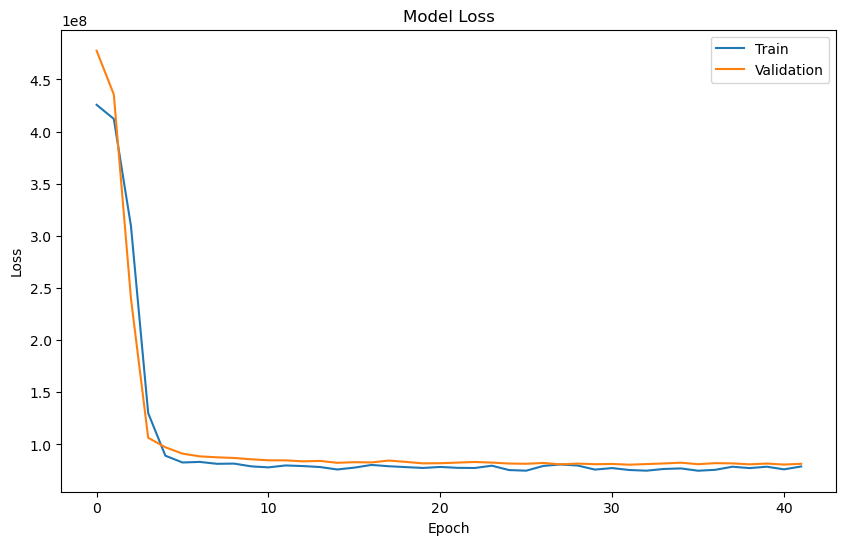

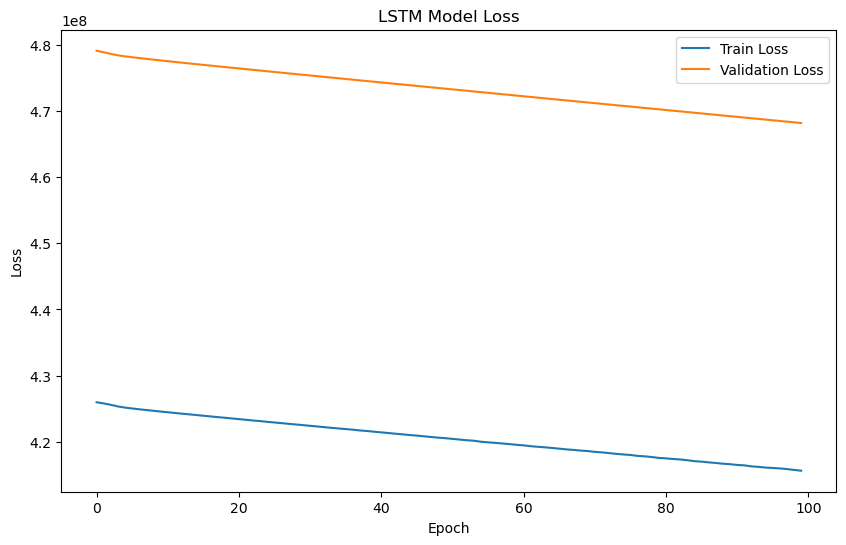

In [48]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history_ann_tuned.history['loss'])
plt.plot(history_ann_tuned.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()


# Plot training & validation loss values for LSTM
plt.figure(figsize=(10, 6))
plt.plot(history_lstm_tuned.history['loss'], label='Train Loss')
plt.plot(history_lstm_tuned.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

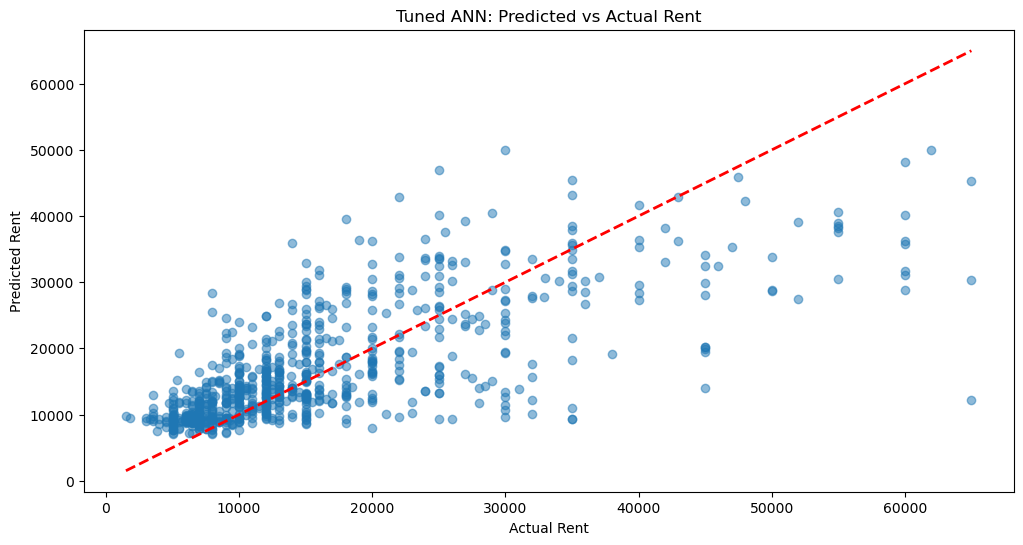

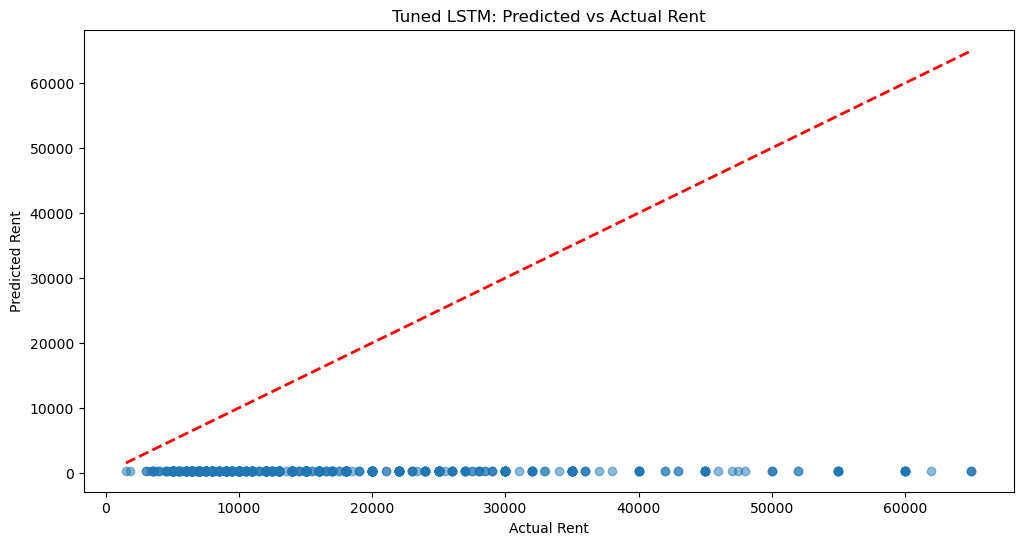

In [49]:
# Scatter plot for Tuned ANN predictions
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_ann_tuned, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.title('Tuned ANN: Predicted vs Actual Rent')
plt.show()

# Scatter plot for Tuned LSTM predictions
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_lstm_tuned, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.title('Tuned LSTM: Predicted vs Actual Rent')
plt.show()

In [50]:
#Observations:

#(1)ANN vs. LSTM:
#ANNs generally have better performance in terms of MAE, MSE, and R² score compared to LSTMs. 
#This suggests that, the ANN models are more accurate and have a better fit to the data.

#(2)Tuning Effectiveness:
#Tuning improves the performance of the ANN, reducing MAE and MSE, and increasing the R² score.
#This indicates that tuning had a beneficial effect on the ANN.
#For the LSTM, tuning worsened the performance across all metrics.
#This  suggest that the LSTM is not be the right model for this problem.

#(3)R² Score:
#The R² score for the LSTM models is negative, which implies that the LSTM models are performing worse.
#This is a sign that the LSTM might not be capturing the underlying patterns effectively.

In [51]:
#ANN and LSTM(3)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, BatchNormalization
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming you have already preprocessed your data and defined `house_rent_cleaned`
# Define features and target
features = ['BHK', 'Size', 'Floor', 'Bathroom', 'Area Type', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']
target = 'Rent'

# Prepare feature and target arrays
X = house_rent_cleaned[features].values
y = house_rent_cleaned[target].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the enhanced ANN model
ann_model_enhanced = Sequential()
ann_model_enhanced.add(Dense(128, input_dim=X_train.shape[1], kernel_regularizer=l2(0.01)))
ann_model_enhanced.add(LeakyReLU(alpha=0.1))
ann_model_enhanced.add(BatchNormalization())
ann_model_enhanced.add(Dropout(0.5))
ann_model_enhanced.add(Dense(64, kernel_regularizer=l2(0.01)))
ann_model_enhanced.add(LeakyReLU(alpha=0.1))
ann_model_enhanced.add(BatchNormalization())
ann_model_enhanced.add(Dropout(0.5))
ann_model_enhanced.add(Dense(32, kernel_regularizer=l2(0.01)))
ann_model_enhanced.add(LeakyReLU(alpha=0.1))
ann_model_enhanced.add(Dense(1))  # Output layer with no activation function for regression

# Compile the model
ann_model_enhanced.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_ann_enhanced = ann_model_enhanced.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/100


/Users/punyakn/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/punyakn/anaconda3/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 435509920.0000 - val_loss: 479092128.0000
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - loss: 433160128.0000 - val_loss: 477973728.0000
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - loss: 433255008.0000 - val_loss: 474353760.0000
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 424528800.0000 - val_loss: 465793312.0000
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - loss: 407231104.0000 - val_loss: 450977696.0000
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - loss: 395302464.0000 - val_loss: 429650720.0000
Epoch 7/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - loss: 392168928.0000 - val_loss: 404594240.0000
Epoch 8/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - loss: 344600032.0000 - val_loss: 373427392.0000
Epoch 9/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - loss: 316251008.0000 - val_loss: 337520128.0000
Epoch 10/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - loss: 331607840.0000 - val_loss

76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - loss: 82206032.0000 - val_loss: 83112232.0000
Epoch 62/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - loss: 72792792.0000 - val_loss: 82684632.0000
Epoch 63/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - loss: 79691504.0000 - val_loss: 83091488.0000
Epoch 64/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 76177648.0000 - val_loss: 83479336.0000
Epoch 65/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - loss: 69953752.0000 - val_loss: 82819448.0000
Epoch 66/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - loss: 74656984.0000 - val_loss: 81937520.0000
Epoch 67/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - loss: 78933784.0000 - val_loss: 82317744.0000
Epoch 68/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - loss: 72743920.0000 - val_loss: 81907408.0000
Epoch 69/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - loss: 82661584.0000 - val_loss: 81229072.0000
Epoch 70/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - loss: 76426360.0000 - val_loss: 8159394

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Input
import numpy as np

# Reshape data for LSTM (samples, timesteps, features)
X_train_lstm = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Define the enhanced LSTM model
lstm_model_enhanced = Sequential()
lstm_model_enhanced.add(Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model_enhanced.add(LSTM(100, return_sequences=True, kernel_regularizer=l2(0.01)))
lstm_model_enhanced.add(BatchNormalization())
lstm_model_enhanced.add(Dropout(0.3))
lstm_model_enhanced.add(LSTM(50, kernel_regularizer=l2(0.01)))
lstm_model_enhanced.add(BatchNormalization())
lstm_model_enhanced.add(Dropout(0.3))
lstm_model_enhanced.add(Dense(1))  # Output layer

# Compile the model
lstm_model_enhanced.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_lstm_enhanced = lstm_model_enhanced.fit(X_train_lstm, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 428352768.0000 - val_loss: 479213824.0000
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 428233408.0000 - val_loss: 479157792.0000
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 419500960.0000 - val_loss: 479045856.0000
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 437620352.0000 - val_loss: 478788864.0000
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 418699936.0000 - val_loss: 478428416.0000
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 442227680.0000 - val_loss: 477912064.0000
Epoch 7/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 407112096.0000 - val_loss: 477251168.0000
Epoch 8/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 426554688.0000 - val_loss: 476571456.0000
Epoch 9/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 425726400.0000 - val_loss: 475974304.0000
Epoch 10/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 422027360.0000 - val_loss: 4754

76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 342232704.0000 - val_loss: 386366688.0000
Epoch 62/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 334578912.0000 - val_loss: 383701088.0000
Epoch 63/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 336600960.0000 - val_loss: 381227104.0000
Epoch 64/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 321007392.0000 - val_loss: 379908672.0000
Epoch 65/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 335936352.0000 - val_loss: 376262240.0000
Epoch 66/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 345854304.0000 - val_loss: 375163744.0000
Epoch 67/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 332288960.0000 - val_loss: 372954720.0000
Epoch 68/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 316713664.0000 - val_loss: 368791520.0000
Epoch 69/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 326206432.0000 - val_loss: 365677088.0000
Epoch 70/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 333911392.0000 - val_loss: 36286809

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions
y_pred_ann_enhanced = ann_model_enhanced.predict(X_test)
y_pred_lstm_enhanced = lstm_model_enhanced.predict(X_test_lstm)

# Calculate metrics for enhanced ANN
mae_ann_enhanced = mean_absolute_error(y_test, y_pred_ann_enhanced)
mse_ann_enhanced = mean_squared_error(y_test, y_pred_ann_enhanced)
r2_ann_enhanced = r2_score(y_test, y_pred_ann_enhanced)

print(f"Enhanced ANN Mean Absolute Error: {mae_ann_enhanced}")
print(f"Enhanced ANN Mean Squared Error: {mse_ann_enhanced}")
print(f"Enhanced ANN R² Score: {r2_ann_enhanced}")

# Calculate metrics for enhanced LSTM
mae_lstm_enhanced = mean_absolute_error(y_test, y_pred_lstm_enhanced)
mse_lstm_enhanced = mean_squared_error(y_test, y_pred_lstm_enhanced)
r2_lstm_enhanced = r2_score(y_test, y_pred_lstm_enhanced)

print(f"Enhanced LSTM Mean Absolute Error: {mae_lstm_enhanced}")
print(f"Enhanced LSTM Mean Squared Error: {mse_lstm_enhanced}")
print(f"Enhanced LSTM R² Score: {r2_lstm_enhanced}")


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Enhanced ANN Mean Absolute Error: 5482.321775077193
Enhanced ANN Mean Squared Error: 62346023.269062445
Enhanced ANN R² Score: 0.5377795361382987
Enhanced LSTM Mean Absolute Error: 12138.477766397462
Enhanced LSTM Mean Squared Error: 228055263.49532995
Enhanced LSTM R² Score: -0.6907543440901664


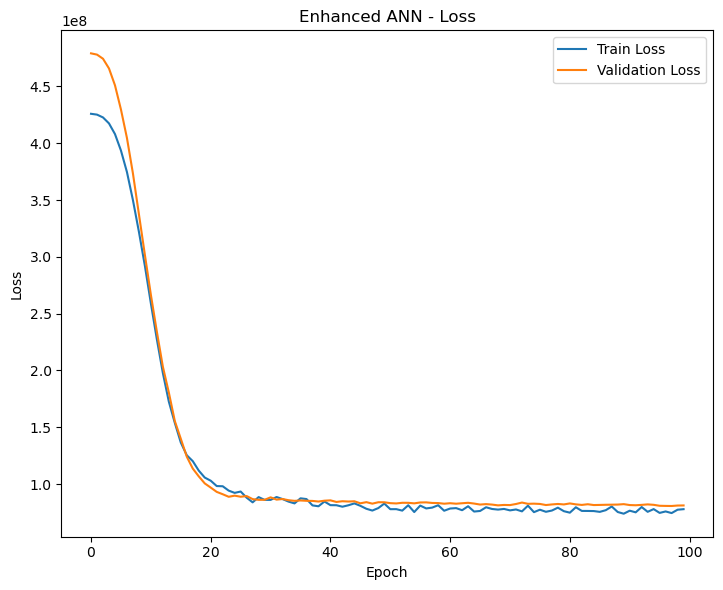

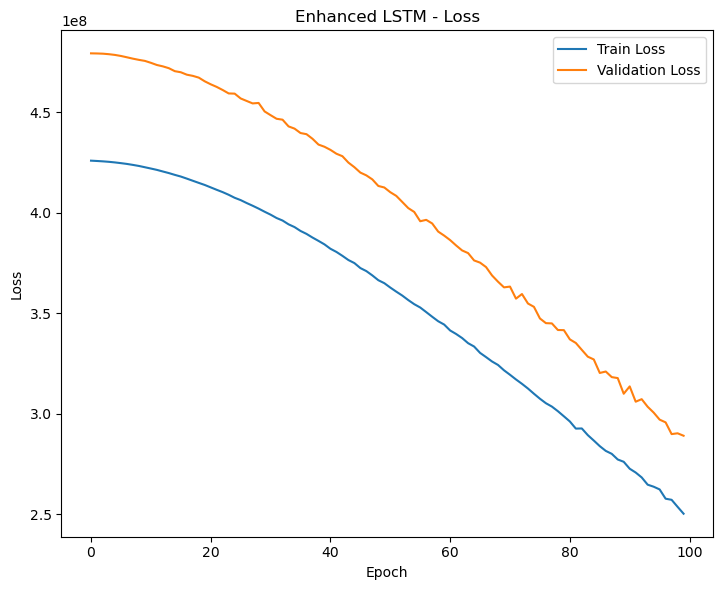

In [54]:
import matplotlib.pyplot as plt

def plot_training_history(history, title):
    plt.figure(figsize=(14, 6))
    
    # Plot training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    # Plot training and validation metrics if available
    if 'mae' in history.history:
        plt.subplot(1, 2, 2)
        plt.plot(history.history['mae'], label='Train MAE')
        plt.plot(history.history['val_mae'], label='Validation MAE')
        plt.title(f'{title} - MAE')
        plt.xlabel('Epoch')
        plt.ylabel('Mean Absolute Error')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# Plot history for enhanced ANN
plot_training_history(history_ann_enhanced, 'Enhanced ANN')

# Plot history for enhanced LSTM
plot_training_history(history_lstm_enhanced, 'Enhanced LSTM')

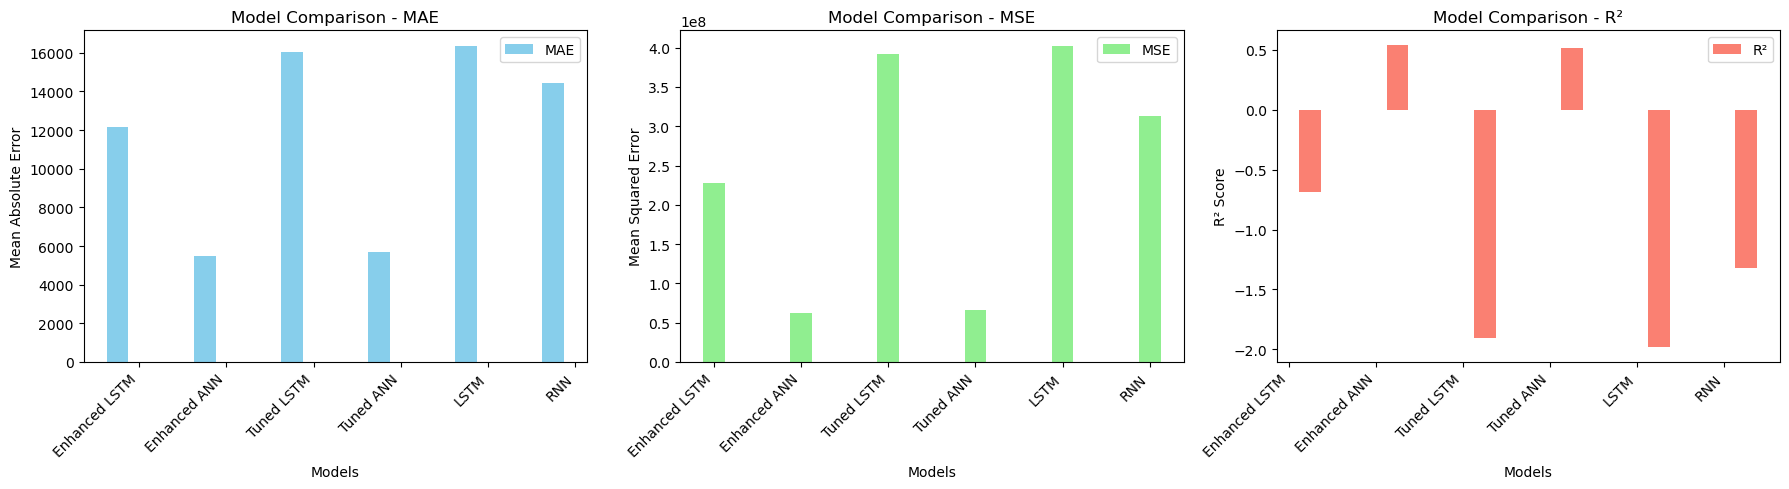

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Enhanced LSTM', 'Enhanced ANN', 'Tuned LSTM', 'Tuned ANN', 'LSTM', 'RNN']

# Evaluation metrics
mae_scores = [mae_lstm_enhanced, mae_ann_enhanced, mae_lstm_tuned, mae_ann_tuned, mae_lstm, mae_rnn]
mse_scores = [mse_lstm_enhanced, mse_ann_enhanced, mse_lstm_tuned, mse_ann_tuned, mse_lstm, mse_rnn]
r2_scores = [r2_lstm_enhanced, r2_ann_enhanced, r2_lstm_tuned, r2_ann_tuned, r2_lstm, r2_rnn]

# Plotting
x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# MAE Plot
ax[0].bar(x - width, mae_scores, width, label='MAE', color='skyblue')
ax[0].set_xlabel('Models')
ax[0].set_ylabel('Mean Absolute Error')
ax[0].set_title('Model Comparison - MAE')
ax[0].set_xticks(x)
ax[0].set_xticklabels(models, rotation=45, ha='right')
ax[0].legend()

# MSE Plot
ax[1].bar(x, mse_scores, width, label='MSE', color='lightgreen')
ax[1].set_xlabel('Models')
ax[1].set_ylabel('Mean Squared Error')
ax[1].set_title('Model Comparison - MSE')
ax[1].set_xticks(x)
ax[1].set_xticklabels(models, rotation=45, ha='right')
ax[1].legend()

# R² Plot
ax[2].bar(x + width, r2_scores, width, label='R²', color='salmon')
ax[2].set_xlabel('Models')
ax[2].set_ylabel('R² Score')
ax[2].set_title('Model Comparison - R²')
ax[2].set_xticks(x)
ax[2].set_xticklabels(models, rotation=45, ha='right')
ax[2].legend()

plt.tight_layout()
plt.show()
